## 1. Creating Embeddings

In [1]:
import csv
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy import spatial
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer

/Users/rakshitgupta/anaconda3/envs/tutorial/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [89]:
classmates_map = {}
with open('Dataset.csv', newline='') as csv_file:
    classmates = csv.reader(csv_file, delimiter=',', quotechar='"')
    next(classmates)  # Skip the header row
    for row in classmates:
        name, paragraph = row
        classmates_map[name] = paragraph


In [93]:
def generate_embeddings(class_val_map):
    # Generate sentence embeddings
    sentence_trasformer_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    paragraphs = list(class_val_map.values())
    embeddings = sentence_trasformer_model.encode(paragraphs)    
    # Create a dictionary to store embeddings for each person
    person_embeddings = {list(class_val_map.keys())[list(class_val_map.values()).index(paragraph)]: embedding for paragraph, embedding in zip(paragraphs, embeddings)}
    return person_embeddings

person_embeddings = generate_embeddings(classmates_map)


## 2. Creating Visualization

In [55]:
# Reducing dimensionality of embedding data, scaling to coordinate domain/range
reducer = umap.UMAP(random_state=42)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(list(person_embeddings.values()))
reduced_data = reducer.fit_transform(scaled_data)

/Users/rakshitgupta/anaconda3/envs/tutorial/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


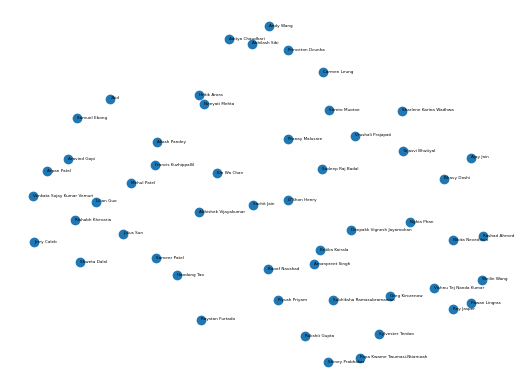

In [56]:
# Creating lists of coordinates with accompanying labels
x = [row[0] for row in reduced_data]
y = [row[1] for row in reduced_data]
label = list(person_embeddings.keys())

# Plotting and annotating data points
plt.scatter(x,y)
for i, name in enumerate(label):
    plt.annotate(name, (x[i], y[i]), fontsize="3")

# Clean-up and Export
plt.axis('off')
plt.savefig('visualization.png', dpi=800)


## 3. [BONUS] Providing top matches

In [62]:
top_matches = {}
all_personal_pairs = defaultdict(list)
for person in classmates_map.keys():
    for person1 in classmates_map.keys():
        all_personal_pairs[person].append([spatial.distance.cosine(person_embeddings[person1], person_embeddings[person]), person1])

for person in classmates_map.keys():
    top_matches[person] = sorted(all_personal_pairs[person], key=lambda x: x[1])

print(top_matches)

{'Greg Kirczenow': [[0.5346776247024536, 'Abhilash Sibi'], [0.5431482195854187, 'Abhishek Vijayakumar '], [0.5666366815567017, 'Aditya Chaudhari'], [0.29485511779785156, 'Ajay Jain'], [0.6699321568012238, 'Akash Pandey'], [0.2771165370941162, 'Amanpreet Singh'], [0.8488149344921112, 'Andy Wang'], [0.5534827709197998, 'Aravind Gopi'], [0.5047937035560608, 'Arpan Patel'], [0.4585683345794678, 'Bhavy Doshi'], [0.6438676416873932, 'Carmen Leung'], [0.2567036747932434, "D'Shon Henry"], [0.7048465609550476, 'Deepakk Vignesh Jayamohan'], [0.5102720260620117, 'Francis Kuzhippallil '], [0, 'Greg Kirczenow'], [0.4876577854156494, 'Haodong Tao'], [0.8638187795877457, 'Hritik Arora'], [0.5199759900569916, 'Jerry Caleb'], [0.4825100898742676, 'Julius Sun'], [0.9038051813840866, 'Kin Wa Chan'], [0.6461987197399139, 'Kritika Koirala'], [0.3815610408782959, 'Lilian Guo'], [0.3637080788612366, 'Mehul Patel'], [0.6087300479412079, 'Neeyati Mehta'], [0.2990275025367737, 'Nghia Phan'], [0.2688471674919128

# DATA

In [63]:
print(classmates_map)

{'Greg Kirczenow': 'I enjoy being outdoors in nature, trail running and surfing.', 'Nikita Neveditsin': 'I like hiking, swimming, traveling, enjoying nice weather and sun (and h.a.t.e winters!)', 'Pranay Malusare': 'I like reading books, playing cricket and binge watching movies and web series. ', 'Rishabh Khevaria': 'I enjoy activities like badminton, swimming and places like arcade and bowling.', 'Raoof Naushad': 'I enjoy staying physically active, have a love for journaling and exploring new hobbies.', 'Rakshit Gupta': 'I love travelling and exploring new places and enjoy activities like swimming and basketball.', 'Princeton Dcunha': 'I like to play Chess, editing videos, watching japanese dramas & listening to japanese music', 'Bhavy Doshi': "I like watching movies and anime, enjoy a walk on hill side and don't like cold.", 'Neeyati Mehta': 'I like sleeping.', "D'Shon Henry": 'I like playing video games, watching youtube and hiking.', 'Nghia Phan': 'I like hiking, watching soccer, 

In [68]:
print(classmates_map['Rakshit Gupta'])
print(classmates_map['Neeyati Mehta'])
print(classmates_map['Sylvester Terdoo'])

I love travelling and exploring new places and enjoy activities like swimming and basketball.
I like sleeping.
i enjoy spending time in the outdoors


In [121]:
selected_list = ['Rakshit Gupta','Neeyati Mehta','Sylvester Terdoo','Tejasvi Bhutiyal']

In [122]:
classmates_map_data_change ={key:val for key , val in  classmates_map.items() if key in selected_list}

In [209]:
classmates_map_data_change['Rakshit Gupta']= 'I have a passion for journeying to new destinations, uncovering unfamiliar places, and relish engaging in pastimes such as swimming and basketball.'
classmates_map_data_change['Neeyati Mehta'] = 'I like napping.'
classmates_map_data_change['Sylvester Terdoo'] ='i enjoy spending time inside'

In [210]:
print(classmates_map_data_change['Rakshit Gupta'])
print(classmates_map_data_change['Neeyati Mehta'])
print(classmates_map_data_change['Sylvester Terdoo'])

I have a passion for journeying to new destinations, uncovering unfamiliar places, and relish engaging in pastimes such as swimming and basketball.
I like napping.
i enjoy spending time inside


In [211]:
person_changed_embeddings = generate_embeddings(classmates_map_data_change)

# data_comparison

In [212]:
import numpy as np
from scipy.spatial.distance import cosine


In [213]:
def compare_embeddings(old_embeddings, new_embeddings):
    """Compare embeddings using cosine similarity."""
    similarities = []
    for key in old_embeddings:
        old_emb = np.array(old_embeddings[key])
        new_emb = np.array(new_embeddings[key])
        similarity = 1 - cosine(old_emb, new_emb)
        similarities.append((key, similarity))
    return similarities


In [214]:
#old_embeddings_path = 'path_to_old_embeddings.json'  
#new_embeddings_path = 'path_to_new_embeddings.json'  

#old_embeddings = load_embeddings(old_embeddings_path)
#new_embeddings = load_embeddings(new_embeddings_path)

old_embeddings = { key:val for key,val in person_embeddings.items() if key in selected_list}
new_embeddings = person_changed_embeddings
# Ensure the same keys are present in both dictionaries
assert old_embeddings.keys() == new_embeddings.keys(), "Embedding dictionaries must have the same keys."

# Compare embeddings
similarities = compare_embeddings(old_embeddings, new_embeddings)

# Output the results
for name, similarity in similarities:
    print(f'Similarity for "{name}": {similarity}')

Similarity for "Rakshit Gupta": 0.7892024517059326
Similarity for "Neeyati Mehta": 0.7782765626907349
Similarity for "Sylvester Terdoo": 0.6921371817588806
Similarity for "Tejasvi Bhutiyal": 1
